<a href="https://colab.research.google.com/github/kaushalkumawat77/CodSoft/blob/main/Spam_sms_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score


In [ ]:
df = pd.read_csv('/content/spam.csv', encoding = 'LATIN-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
label_map = {'ham': 0, 'spam': 1}
df['label'] = df['label'].map(lambda x: label_map[x])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.label.value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [ ]:
df.text.nunique()

5169

In [ ]:
df.duplicated().sum()

403

In [ ]:
print(df[df.duplicated(keep=False)])

      label                                               text
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
7         0  As per your request 'Melle Melle (Oru Minnamin...
8         1  WINNER!! As a valued network customer you have...
9         1  Had your mobile 11 months or more? U R entitle...
11        1  SIX chances to win CASH! From 100 to 20,000 po...
...     ...                                                ...
5524      1  You are awarded a SiPix Digital Camera! call 0...
5535      0  I know you are thinkin malaria. But relax, chi...
5539      0                         Just sleeping..and surfing
5553      0                        Hahaha..use your brain dear
5558      0                             Sorry, I'll call later

[684 rows x 2 columns]


In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

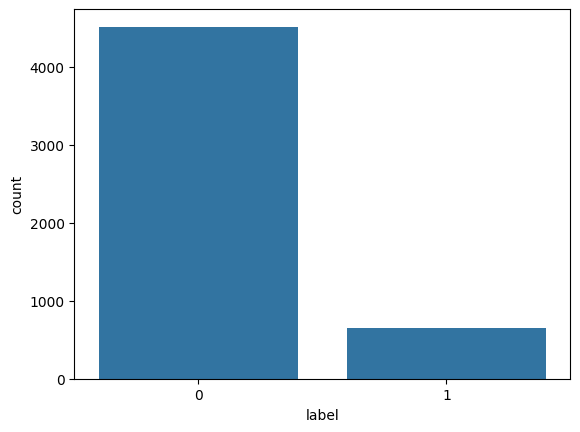

In [ ]:
sns.countplot(x='label', data=df)
plt.show()

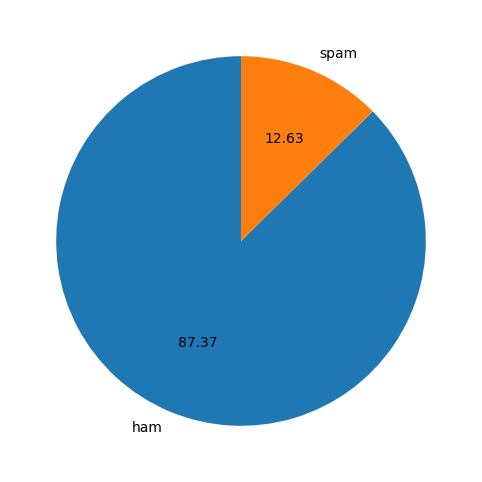

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%1.2f", startangle=90)
plt.show()

In [ ]:

spam_words = ' '.join(df.query('label == 1')['text']).split()

# Count the occurrences of each word
word_counts = Counter(spam_words)

# Create a DataFrame with the words and their frequencies
word_counts_df = pd.DataFrame(word_counts.most_common(15), columns=['Word', 'Frequency'])

# Plot the bar chart
px.bar(word_counts_df, x='Word', y='Frequency', title='Top 15 Most Frequent Words in Spam Messages')

In [ ]:
# Create a list of all words in the spam messages
ham_words = ' '.join(df.query('label == 0')['text']).split()

# Count the occurrences of each word
word_counts = Counter(ham_words)

# Create a DataFrame with the words and their frequencies
word_counts_df = pd.DataFrame(word_counts.most_common(15), columns=['Word', 'Frequency'])

# Plot the bar chart
px.bar(word_counts_df, x='Word', y='Frequency', title='Top 15 Most Frequent Words in Non Spam Messages')

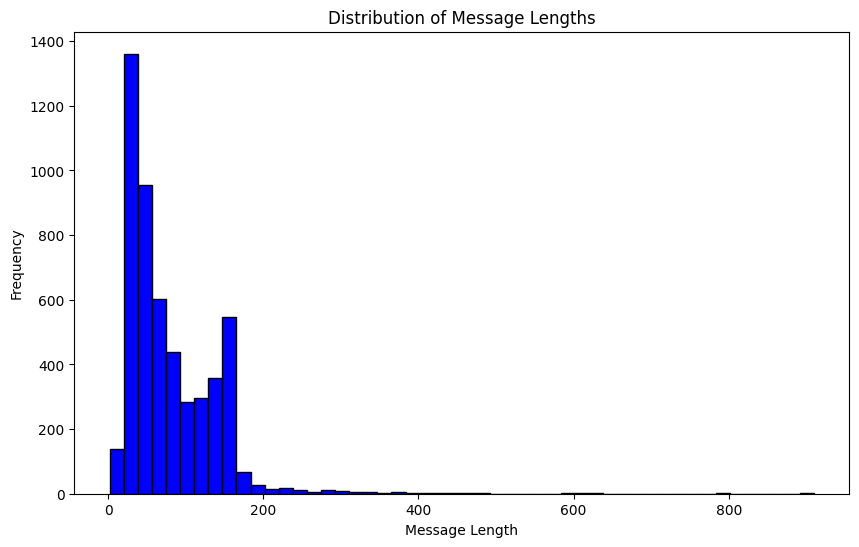

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Calculate the length of each message
df['message_length'] = df['text'].apply(len)

# Plot the distribution of message lengths
plt.figure(figsize=(10, 6))
plt.hist(df['message_length'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle

# Define the BernoulliNB model
model = BernoulliNB()

# Create a pipeline for the BernoulliNB model
pipeline = Pipeline([
    ('model', model)
])

scores = cross_val_score(pipeline, X_train, y_train, cv=5)

mean_accuracy = scores.mean()

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Model: BernoulliNB")
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print()

pickle.dump(pipeline, open('email_spam_classifier.pkl', 'wb'))
print("-----------------------------------------------------------")
print(f"Best model: BernoulliNB with accuracy score: {accuracy}")


Model: BernoulliNB
Cross-validation Accuracy: 0.9762998790810157
Test Accuracy: 0.9738878143133463

-----------------------------------------------------------
Best model: BernoulliNB with accuracy score: 0.9738878143133463


In [ ]:
model = pickle.load(open('email_spam_classifier.pkl', 'rb'))

In [ ]:
def inference(message):
    message = tfidf.transform(message)[0]
    pred = best_model.predict(message)
    if pred == 0:
        print('This is a ham message')
    else:
        print('This is a spam message')

In [ ]:
new_data = ["Don't forget about the team lunch tomorrow at 1 PM. See you there!"]
inference(new_data)

new_data = ["Congratulations! You have won 1,000,000. Claim your prize now!"]
inference(new_data)

new_data = ["Win an iPhone! Scan and pay for Rs10 or more to enter .Your next transaction could make you a winner!"]
inference(new_data)

This is a ham message
This is a spam message
This is a spam message
